In [591]:
# ffmpeg -i mobile_352x288x30x420x300.avi /tmp/%03d.png
import cv2
image0 = cv2.imread("/tmp/010.png")
image1 = cv2.imread("/tmp/018.png")
Y0 = cv2.cvtColor(image0, cv2.COLOR_BGR2YCrCb)[:,:,0]
Y1 = cv2.cvtColor(image1, cv2.COLOR_BGR2YCrCb)[:,:,0]

In [592]:
from matplotlib import pyplot as plt
%matplotlib inline
def show(img):
    plt.figure(figsize = (10,10))
    plt.imshow(img, cmap="gray")

In [593]:
# http://scikit-image.org/docs/dev/auto_examples/transform/plot_pyramid.html
from skimage.transform import pyramid_gaussian
from scipy.ndimage import zoom

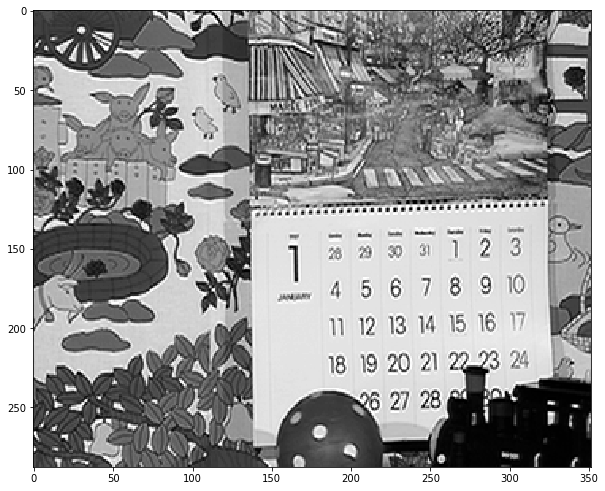

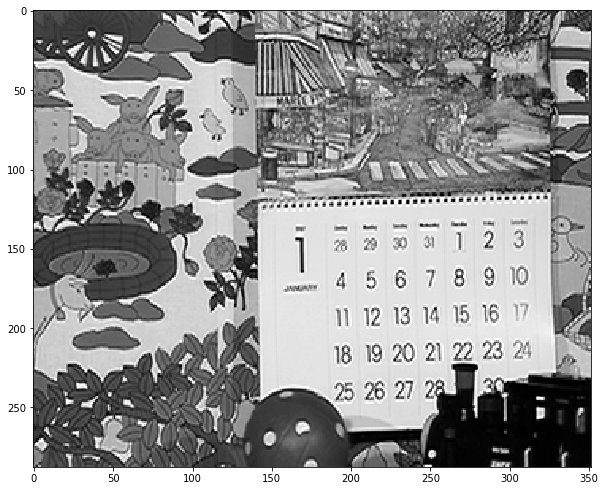

In [594]:
show(Y0)
show(Y1)

In [595]:
import numpy as np
def estimate_frame(reference, flow):
    height, width = flow.shape[:2]
    map_x = np.tile(np.arange(width), (height, 1))
    #print("map_x=",map_x)
    map_y = np.swapaxes(np.tile(np.arange(height), (width, 1)), 0, 1)
    #print("map_y=",map_y)
    #print("flow=",flow)
    map_xy = (flow + np.dstack((map_x, map_y))).astype('float32')
    #print("map_xy=",map_xy)
    return cv2.remap(reference, map_xy, None, 
            interpolation=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REPLICATE)

In [596]:
levels = 0
Y0P = tuple(
    pyramid_gaussian(
        image=Y0,
        max_layer=levels,    # Number of levels of the pyramid
        #downscale=2.0,      # Relative size of each dimmension between levels
        #sigma=2*downscale/6 # Sigma for Gaussian filter
        #order=?             # Order of splines used in interpolation of downsampling
        #mode=?              # The mode parameter determines how the array borders are handled,
        #cval=?              # Value to fill past edges of input if mode is ‘constant’
        multichannel=False  # Whether the last axis of the image is to be interpreted as multiple channels or another spatial dimension
    )
)

In [597]:
Y1P = tuple(
    pyramid_gaussian(
        image=Y1,
        max_layer=levels,    # Number of levels of the pyramid
        #downscale=2.0,      # Relative size of each dimmension between levels
        #sigma=2*downscale/6 # Sigma for Gaussian filter
        #order=?             # Order of splines used in interpolation of downsampling
        #mode=?              # The mode parameter determines how the array borders are handled,
        #cval=?              # Value to fill past edges of input if mode is ‘constant’
        multichannel=False  # Whether the last axis of the image is to be interpreted as multiple channels or another spatial dimension
    )
)

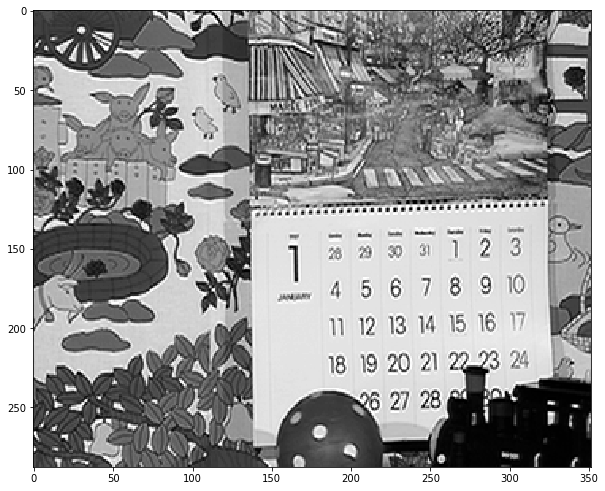

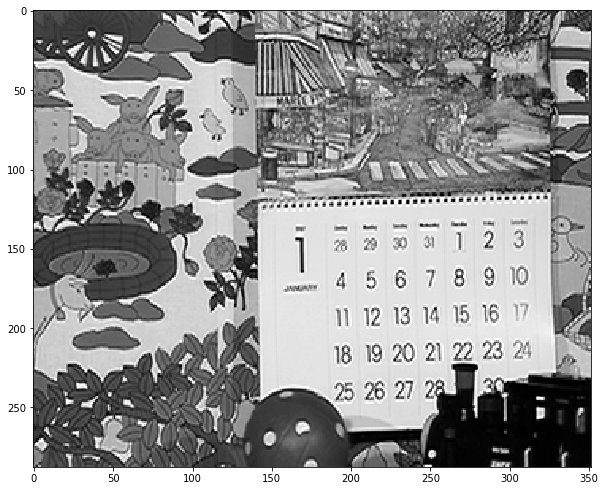

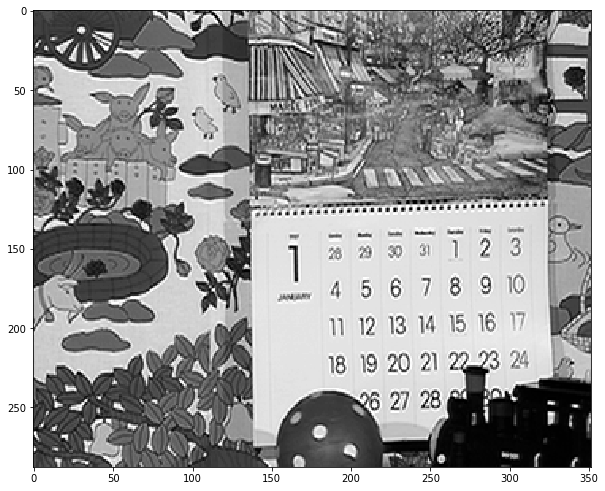

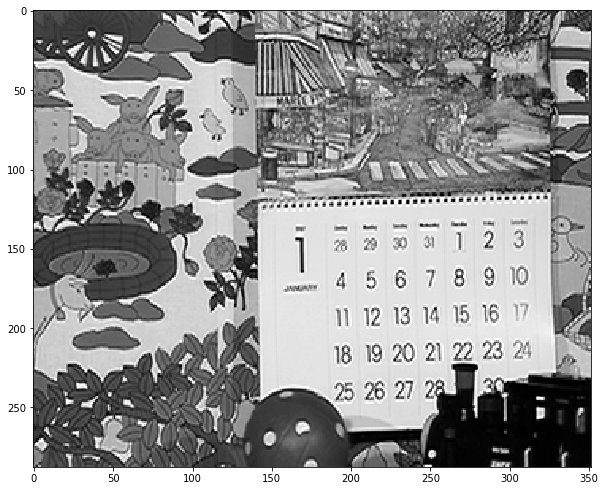

In [598]:
show(Y0P[0]); show(Y1P[0]); show(Y0); show(Y1)

In [639]:
print(Y1P[levels].shape, Y1.shape)
flow = cv2.calcOpticalFlowFarneback(
    prev=Y1,#P[levels],
    next=Y0,#P[levels],
    flow=None,
    pyr_scale=0.5,
    levels=5,
    winsize=5,
    iterations=3,
    poly_n=1, # >= 1
    poly_sigma=1.7,
    flags=0
    #flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN
)
for l in range(levels-1,-1,-1):
    flow = zoom(flow, 2)
    print(flow.shape, l)
    flow = cv2.calcOpticalFlowFarneback(
        prev=Y1P[l],
        next=Y0P[l],
        flow=flow,
        pyr_scale=0.5,
        levels=1,
        winsize=15,
        iterations=3,
        poly_n=5,
        poly_sigma=1.1,
        flags=0
        #flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN
    )
    #prev_flow = flow

(288, 352) (288, 352)


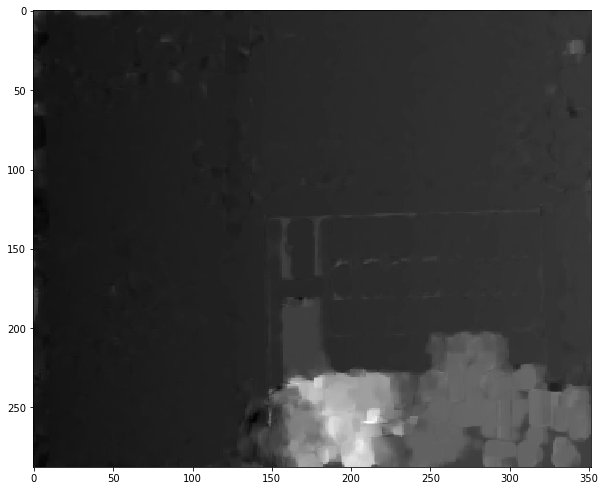

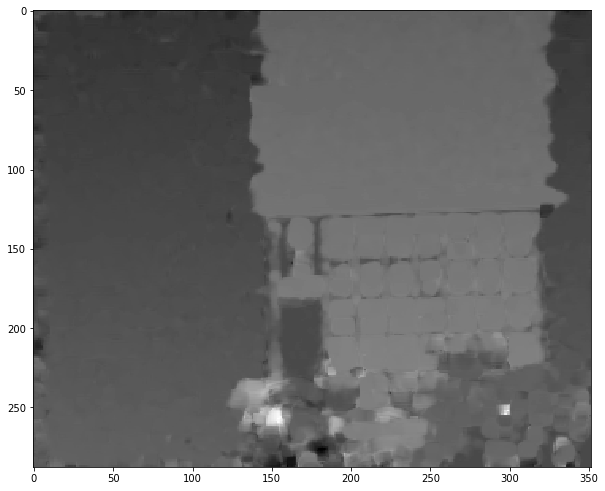

In [640]:
show(flow[:,:,0])
show(flow[:,:,1])

32.510326 -10.75225


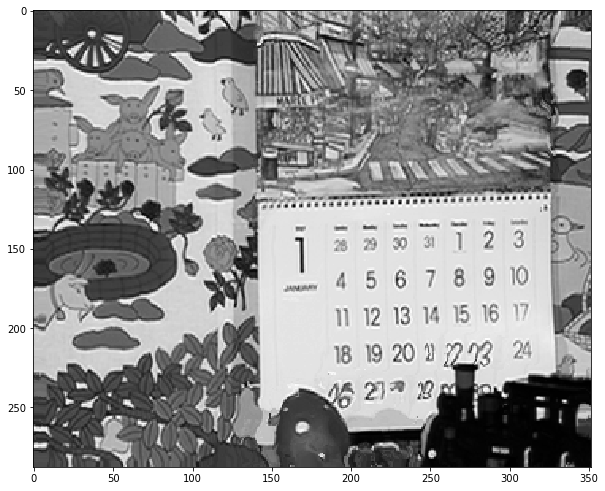

In [641]:
estimation = estimate_frame(Y0, flow)
print(flow.max(), flow.min())
show(estimation)

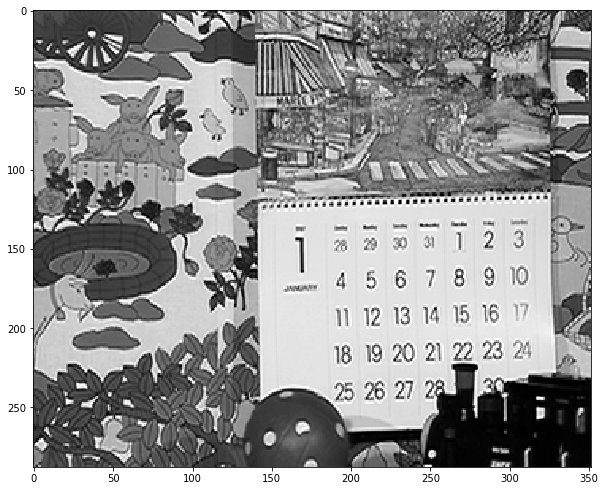

In [642]:
show(Y1)

In [643]:
((estimation - Y1)**2).mean()

45.86037129103536